# In this notebook we reproduce the analytical solution of Loeb & Rybicki (1999) with our Monte Carlo code `RASCAS`.

**Details of Loeb & Rybicki (1999, hereafter LR99)**:
A point source at the centre of a truly Hubble expanding sphere composed having a uniform distribution of hydrogen at 0 K. The SED is monochromatic emitting at the Ly$\alpha$ frequency. The analytical solution is given by$$\tilde{J}(\tilde{\nu},\tilde{r})=\frac{1}{4\pi}\left(\frac{9}{4\pi\tilde{\nu}^3}\right)^{3/2}\exp\left[-\frac{9\tilde{r}^2}{4\tilde{\nu}^3}\right]\,,$$where $\tilde{r}=r/r_{\star}$ and $\tilde{\nu}=(\nu_0-\nu)/\nu_{\star}$.

We reproduce the analytical spectrum with our 0 K version of `RASCAS`, in which the photons redshift as they propagate freely, there is no thermal motion of the atoms and the line profile is given by the approximate Lorentzian, i.e., $\sigma\propto1/(\nu-\nu_0)^2$. I run my simulation on `hydro-cool3/output_00013` which has $256^3$ cells and used $10^7$ MC photons.

**Details of our numerical setup**:
We prepare our cosmological box at $z\approx10$ at uniform density of $n_\mathrm{H}=2.55\times10^{-4}\,\mathrm{cm}^{-3}$. At this redshift $r_\star= 3.22\times10^{24}\,\mathrm{cm}$ is pretty much independent of $z$, but $\nu_{\star}=5.6\times10^{12}\,\Omega_{\mathrm{b}}h(1+z)^{3/2}\,\Omega_{\mathrm{m}}^{-1/2}$. Strictly speaking the sphere radius should be infinite but I have kept it at $\tilde{r}=1$.

First lets read and prepare the RASCAS generated $J(\tilde{r},\tilde{\nu})$ in the right order. In my (unformatted) binary file 1st level is number of number of radial bins ($N_r$, `integer(kind=4)`), 2nd level is number of frequency bins ($N_{\nu}$, `integer(kind=4)`) and at the last is the array $J$ (`real(kind=8)`) of shape $N_r\times N_\nu$. Note that my 'frequency bins' are really the binning in $\tilde{\nu}$ space. Also, the final $J(\tilde{r},\tilde{\nu})$ loaded into `j_r_nu` is, as of now, unnormalised.

In [1]:
import numpy as np
from scipy.io import FortranFile as ff
import matplotlib.pyplot as plt
%matplotlib inline

rstar = 3.22e24
Omega_b = 0.049
H_0 = 67.4
Omega_M = 0.315
one_plus_z = 11.0094

nu_0 = 2.47e15
nu_star = 5.6e10*Omega_b*H_0*one_plus_z**1.5/(np.sqrt(Omega_M))
print('nu_star (Hz) =',nu_star)
def J_ana(r,nu):
    return 1/(4*np.pi)*(4*np.pi*nu**3/9)**(-3/2)*np.exp(-9*r**2/4/nu**3)

fn='/home/shikhar/work/LR99/Jnu.dat' #Full path to the raw palpha data generated by RASCAS.

f = ff(fn)

[N_rad_bins] = f.read_ints()
[N_nu_bins] = f.read_ints()
raw = f.read_reals('d')
np.nan_to_num(raw,copy=False)


print('No.of radial bins =',N_rad_bins)
print('No.of frequency bins =',N_nu_bins)


j_r_nu = np.reshape(raw,[N_rad_bins,N_nu_bins],order='F')

comput_dom_rsp = 0.499
fix_box_size_cm = 6.44e24
rbins = np.linspace(0,comput_dom_rsp,N_rad_bins+1)
rtilde = fix_box_size_cm*(rbins[:-1]+rbins[1:])/2/rstar

for i in range(N_nu_bins):
    j_r_nu[:,i] = j_r_nu[:,i]/rtilde**2


nubins = np.linspace(0.01,10,N_nu_bins+1)
nutilde = (nubins[:-1]+nubins[1:])/2


nu_star (Hz) = 12037441880189.39
No.of radial bins = 1000
No.of frequency bins = 1000


Choose your desired radius by setting the index `r_ind` and generate the corresponding analytical version of $J$. To set the normalisation I have simply shifted my peak to match with the analytical version.

rtilde = 0.050399
Normalisation factor = 9.721124474580371e-12
Shift in nu_tilde required is 0.019979999999999998


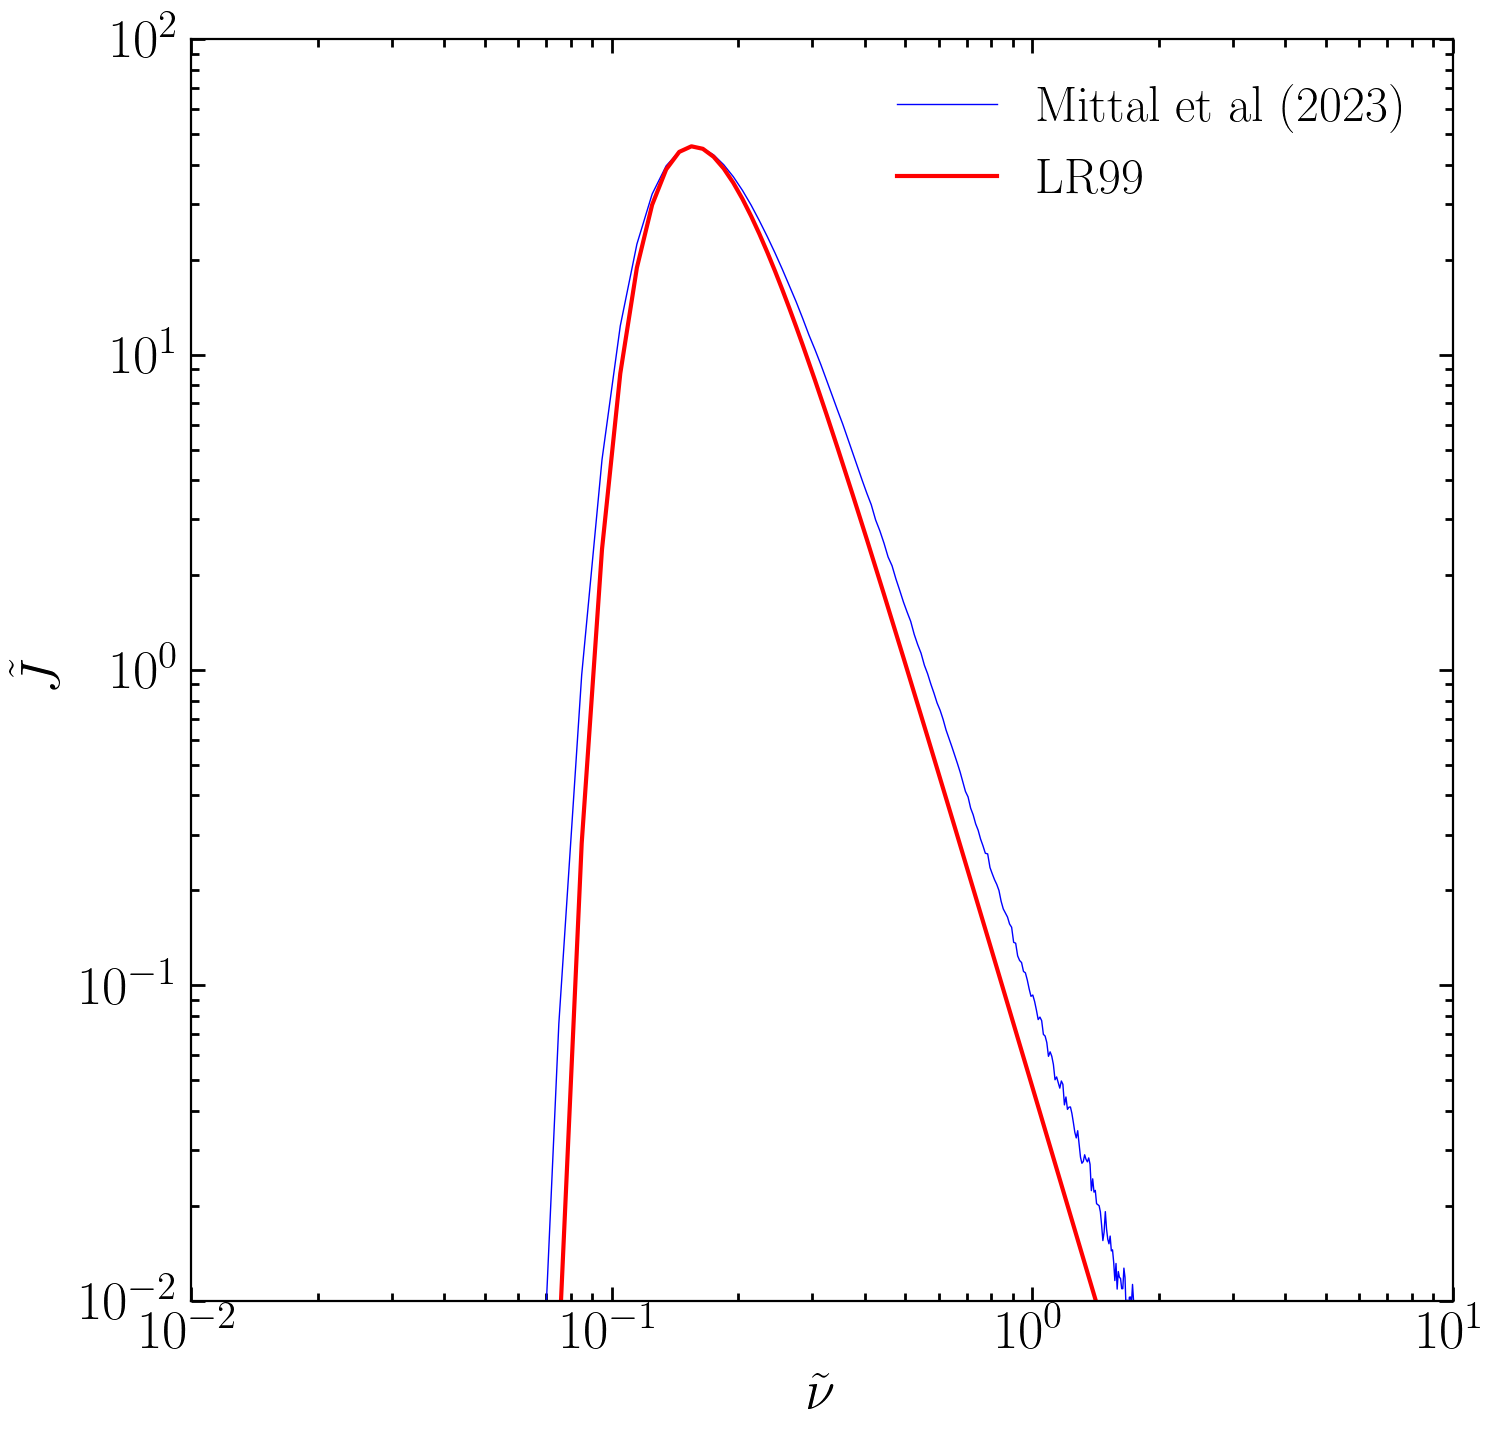

In [2]:
#50, 200, 800
r_ind = 50

print('rtilde =',rtilde[r_ind])

Jtilde = J_ana(rtilde[r_ind],nutilde)

fac = np.max(Jtilde)/np.max(j_r_nu[r_ind,:])
print('Normalisation factor =',fac)

ana_max = np.where(Jtilde==np.max(Jtilde))
num_max = np.where(j_r_nu[r_ind,:]==np.max(j_r_nu[r_ind,:]))
[nu_shift] = nutilde[num_max]-nutilde[ana_max]
print('Shift in nu_tilde required is',nu_shift)


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig,ax=plt.subplots(figsize=(8.3,7.5),dpi=200)
fig.subplots_adjust(left=0.12, bottom=0.07, right=0.88, top=0.97)
ax.loglog(nutilde-nu_shift,fac*j_r_nu[r_ind,:],color='b',lw=0.5,label='Mittal et al (2023)')
ax.loglog(nutilde,Jtilde,'r',label='LR99')
ax.set_xlabel(r"$\tilde{\nu}$",fontsize=20)
ax.set_ylabel(r"$\tilde{J}$",fontsize=20)
ax.tick_params(axis='both', which='major', length=5, width=1, labelsize=20,direction='in')
ax.tick_params(axis='both', which='minor', length=3, width=1,direction='in')
ax.minorticks_on()
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.set_ylim([1e-2,1e2])
ax.set_xlim([0.01,10])
ax.legend(fontsize=18,frameon=False)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

Choose your desired $\log_{10}\tilde{\nu}$ by setting the index `nu_ind` and generate the corresponding analytical version of $J$. To set the normalisation I have simply shifted my peak to match with the analytical version.

log_10(nu_tilde)= -1.4562422768361347
Normalisation factor = 6.7424991278158e-12


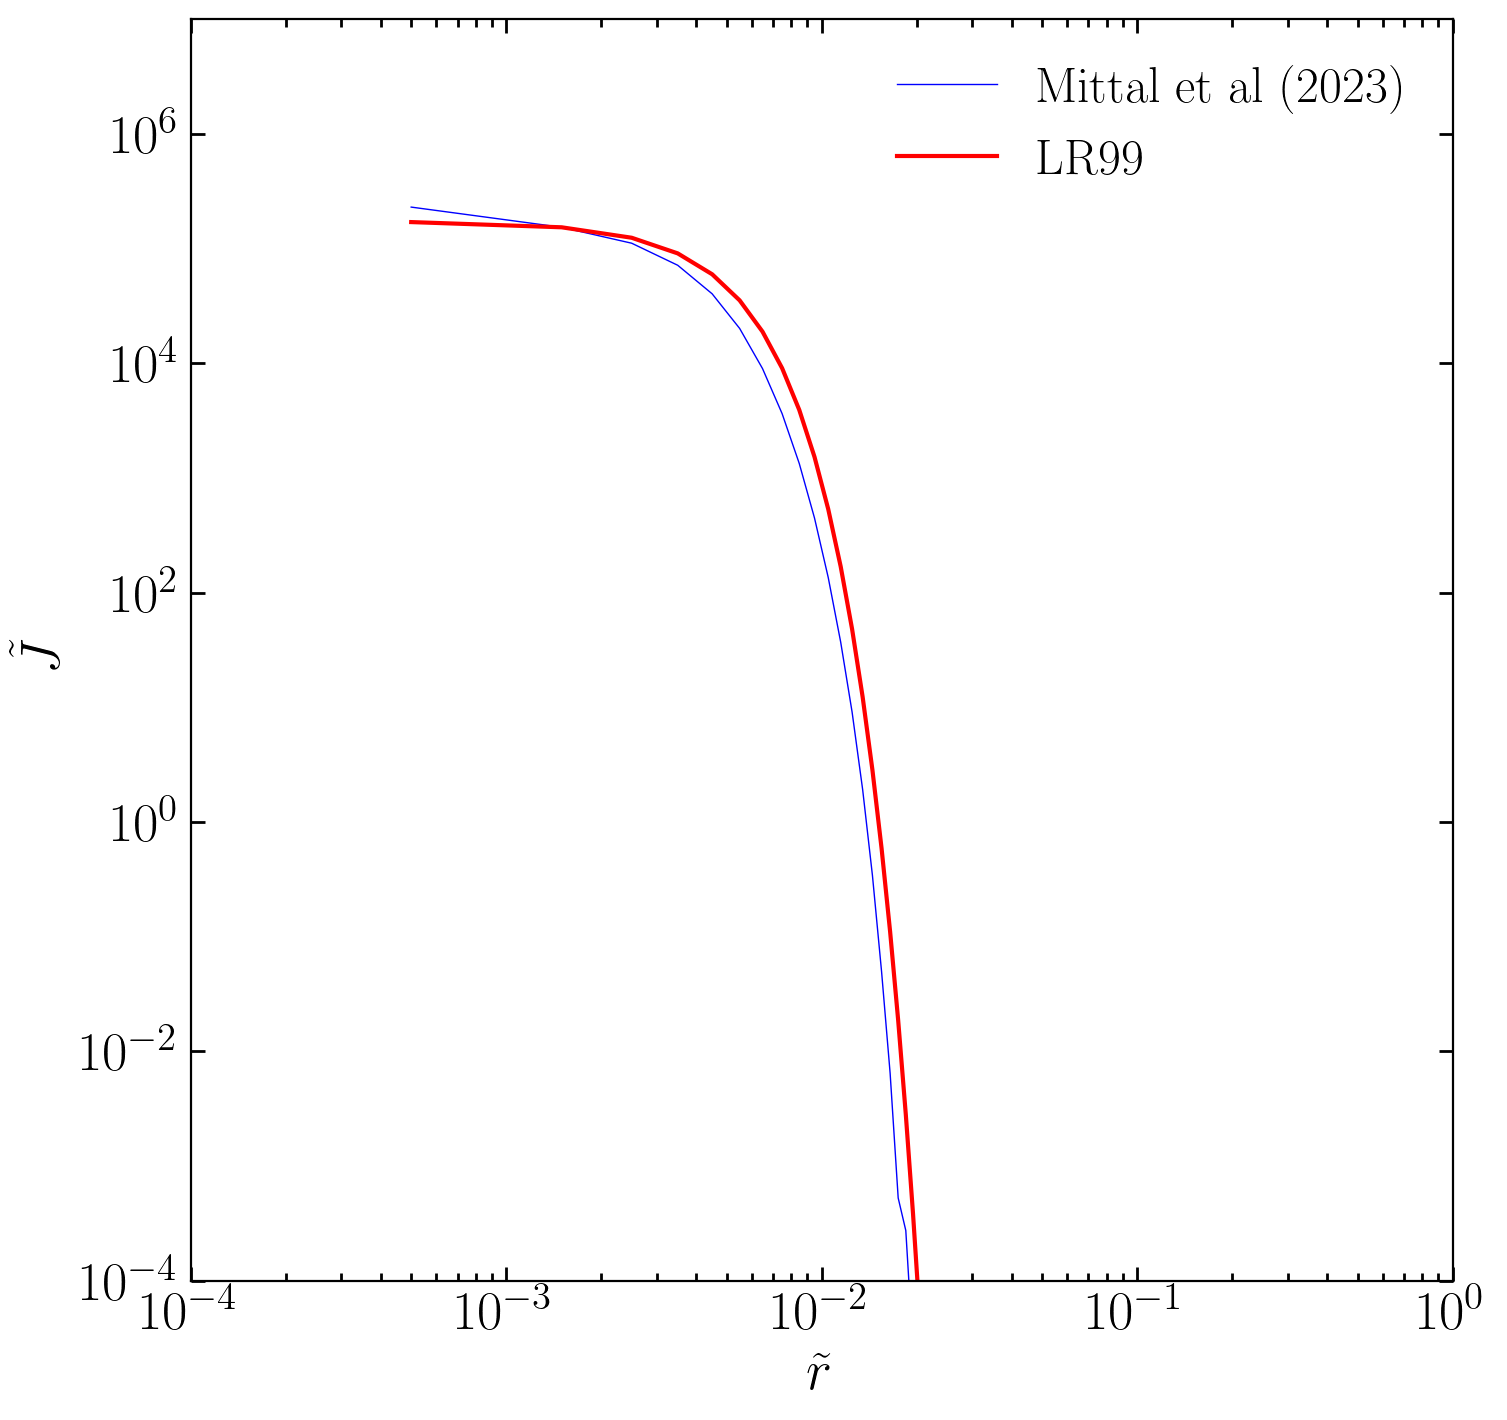

In [9]:
#2,10,50
nu_ind = 2
print('log_10(nu_tilde)=',np.log10(nutilde[nu_ind]))
Jtilde = J_ana(rtilde,nutilde[nu_ind])

fac = Jtilde[1]/j_r_nu[1,nu_ind]
print('Normalisation factor =',fac)


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig,ax=plt.subplots(figsize=(8.3,7.5),dpi=200)
fig.subplots_adjust(left=0.12, bottom=0.07, right=0.88, top=0.97)
ax.loglog(rtilde,fac*j_r_nu[:,nu_ind],color='b',lw=0.5,label='Mittal et al (2023)')
ax.loglog(rtilde,Jtilde,'r',label='LR99')
ax.set_xlabel(r"$\tilde{r}$",fontsize=20)
ax.set_ylabel(r"$\tilde{J}$",fontsize=20)
ax.tick_params(axis='both', which='major', length=5, width=1, labelsize=20,direction='in')
ax.tick_params(axis='both', which='minor', length=3, width=1,direction='in')
ax.minorticks_on()
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.set_ylim([1e-4,1e7])
ax.set_xlim([1e-4,1])
ax.legend(fontsize=18,frameon=False)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

Save your xy data

In [40]:
np.save('nu1',nutilde-nu_shift)
np.save('jnu1',fac*j_r_nu[r_ind,:])

#np.save('nu2',nutilde-nu_shift)
#np.save('jnu2',fac*j_r_nu[r_ind,:])

#np.save('nu3',nutilde-nu_shift)
#np.save('jnu3',fac*j_r_nu[r_ind,:])

In [70]:
np.save('jr1',fac*j_r_nu[:,nu_ind])
#np.save('jr2',fac*j_r_nu[:,nu_ind])
#np.save('jr3',0.7*fac*j_r_nu[:,nu_ind])
#I add the extra 0.7 by hand in the last one to make the analytical and numerical match
#because did not give the best results as it becomes noisy towards low r.

In [75]:
print(rtilde[50],rtilde[200],rtilde[800])

0.050399 0.200099 0.798899


Load all the saved data and combine the plots.

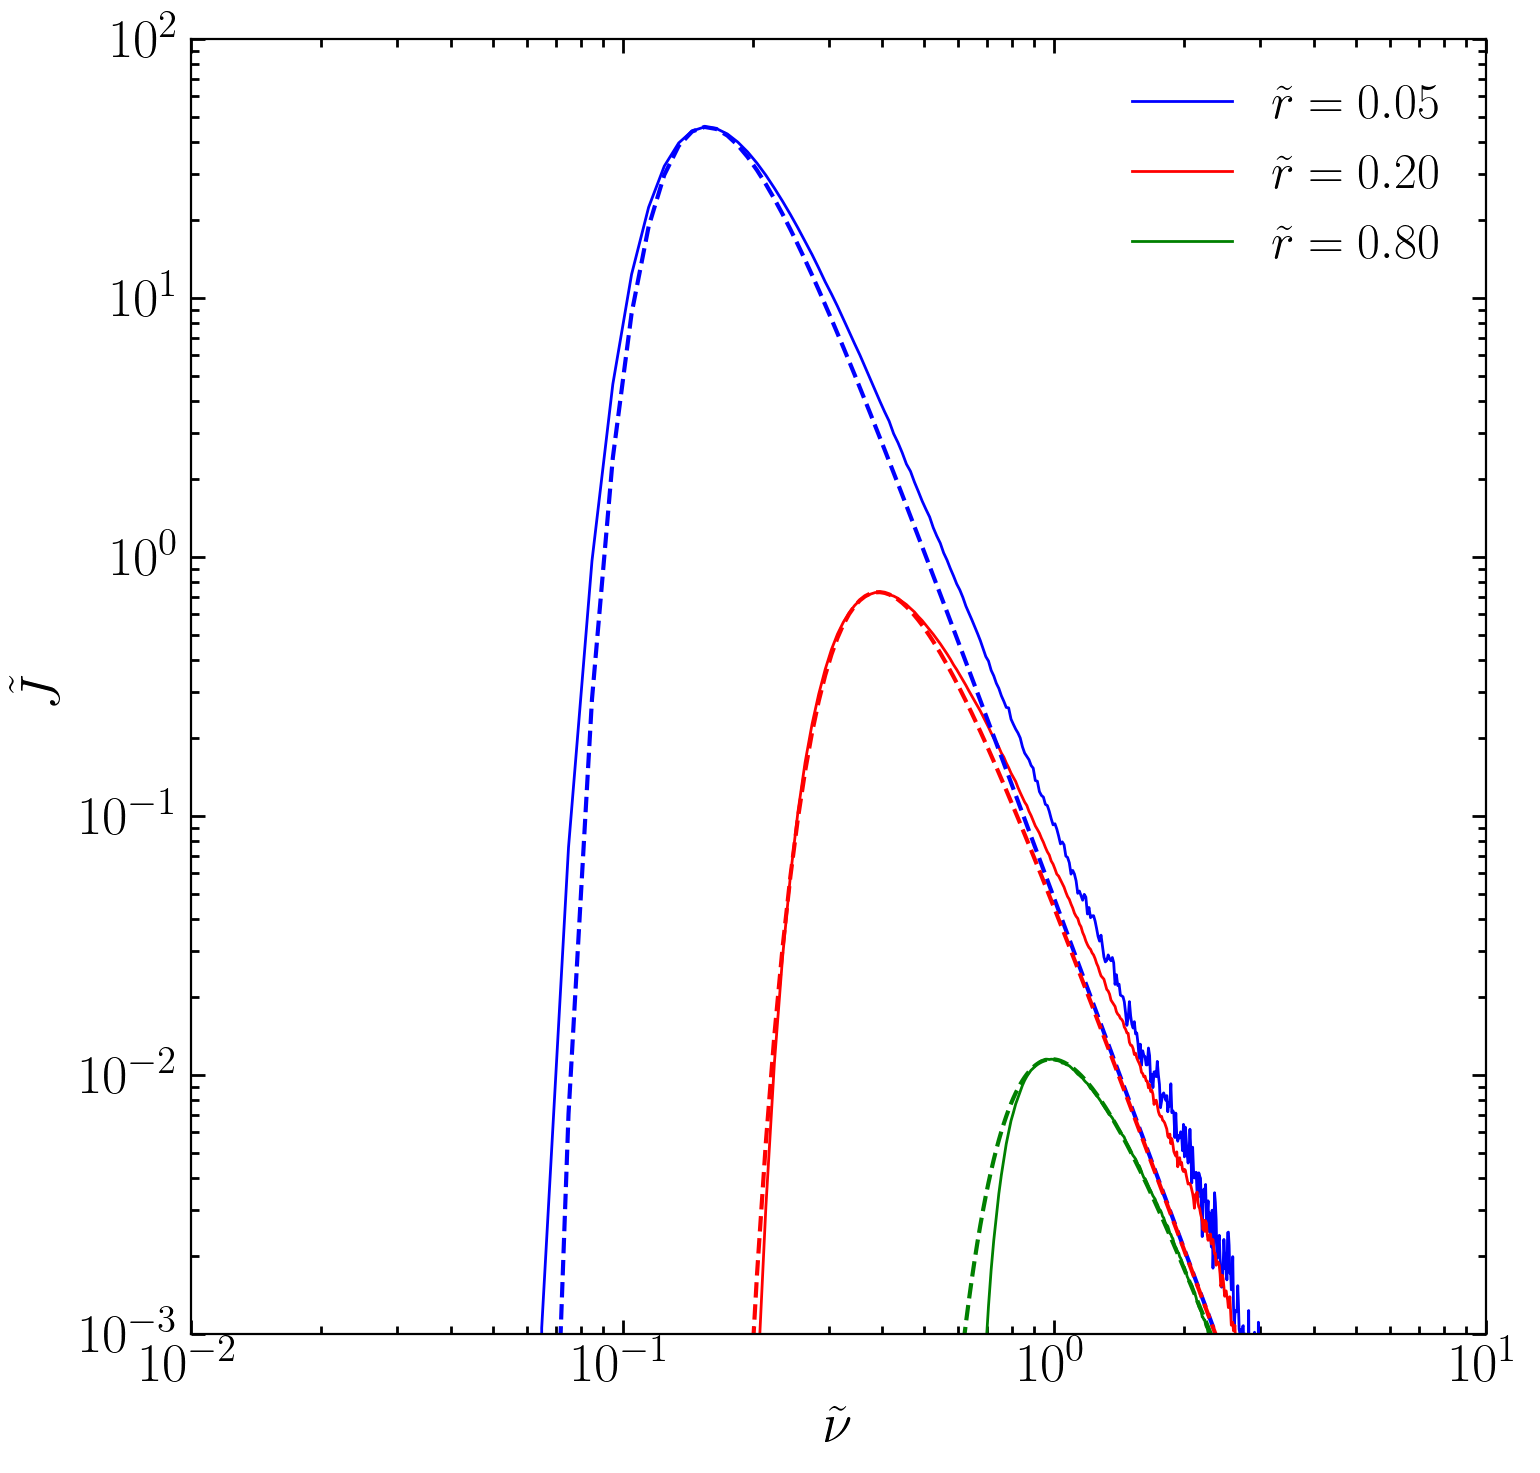

In [4]:
import numpy as np
import matplotlib.pyplot as plt
x1 = np.load('nu1.npy')
y1 = np.load('jnu1.npy')

x2 = np.load('nu2.npy')
y2 = np.load('jnu2.npy')

x3 = np.load('nu3.npy')
y3 = np.load('jnu3.npy')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig,ax=plt.subplots(figsize=(8.3,7.3),dpi=200)
fig.subplots_adjust(left=0.11, bottom=0.06, right=0.89, top=1.0)
ax.loglog(x1,y1,color='b',lw=1,label=r'$\tilde{r}=0.05$')
ax.loglog(x2,y2,color='r',lw=1,label=r'$\tilde{r}=0.20$')
ax.loglog(x3,y3,color='g',lw=1,label=r'$\tilde{r}=0.80$')

ax.loglog(nutilde,J_ana(rtilde[50],nutilde),'b--')
ax.loglog(nutilde,J_ana(rtilde[200],nutilde),'r--')
ax.loglog(nutilde,J_ana(rtilde[800],nutilde),'g--')
ax.set_xlabel(r"$\tilde{\nu}$",fontsize=20)
ax.set_ylabel(r"$\tilde{J}$",fontsize=20)
ax.tick_params(axis='both', which='major', length=5, width=1, labelsize=20,direction='in')
ax.tick_params(axis='both', which='minor', length=3, width=1,direction='in')
ax.minorticks_on()
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.set_ylim([1e-3,100])
ax.set_xlim([0.01,10])
ax.legend(fontsize=18,frameon=False)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('LR99_1.pdf')

In [74]:
print(nutilde[2],nutilde[10],nutilde[50])
print(np.log10(nutilde[2]),np.log10(nutilde[10]),np.log10(nutilde[50]))

0.034975000000000006 0.114895 0.514495
-1.4562422768361347 -0.9396988705254475 -0.28861884147095723


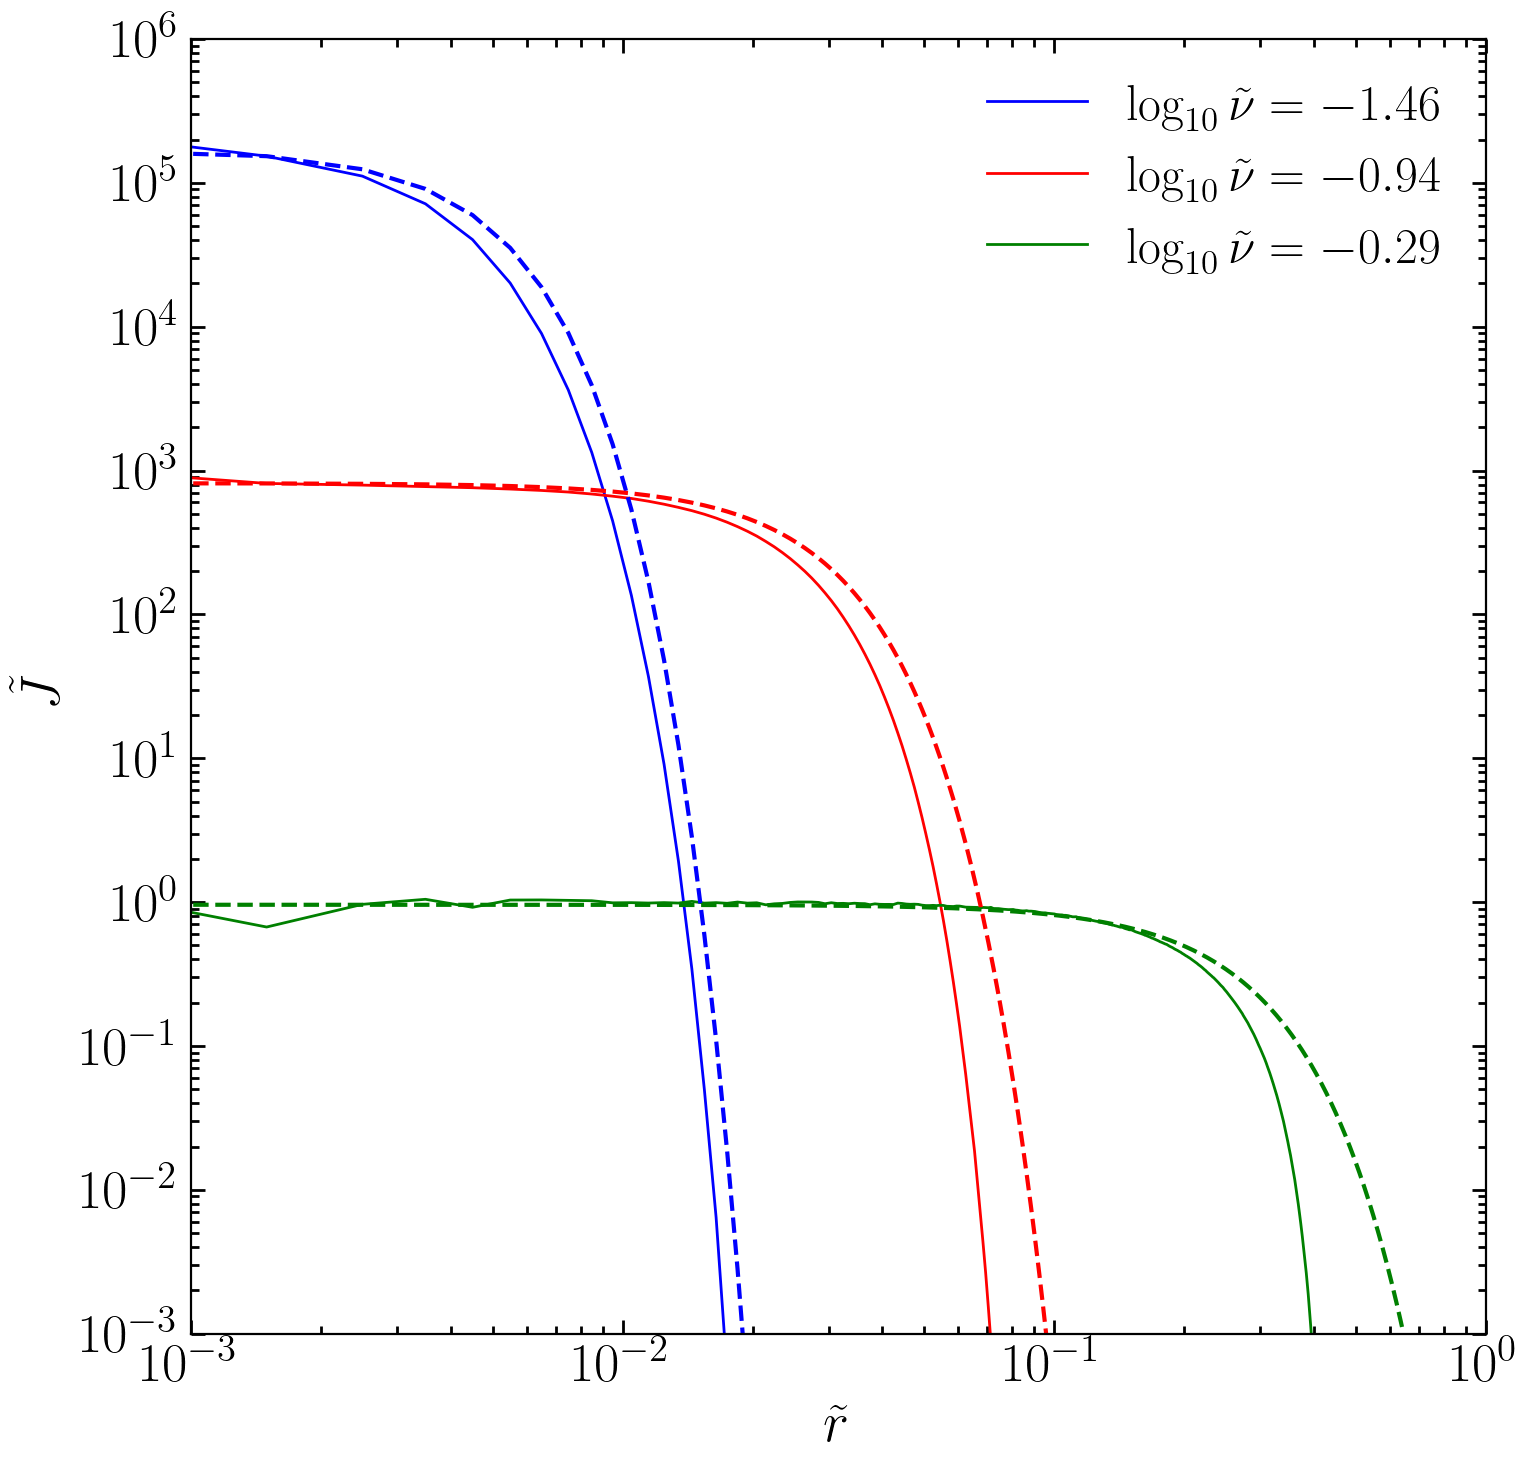

In [7]:
jr1 = np.load('jr1.npy')
jr2 = np.load('jr2.npy')
jr3 = np.load('jr3.npy')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig,ax=plt.subplots(figsize=(8.3,7.3),dpi=200)
fig.subplots_adjust(left=0.11, bottom=0.06, right=0.89, top=1.0)
ax.loglog(rtilde,jr1,color='b',lw=1,label=r'$\log_{10}\tilde{\nu}=-1.46$')
ax.loglog(rtilde,jr2,color='r',lw=1,label=r'$\log_{10}\tilde{\nu}=-0.94$')
ax.loglog(rtilde,jr3,color='g',lw=1,label=r'$\log_{10}\tilde{\nu}=-0.29$')

ax.loglog(rtilde,J_ana(rtilde,nutilde[2]),'b--')
ax.loglog(rtilde,J_ana(rtilde,nutilde[10]),'r--')
ax.loglog(rtilde,J_ana(rtilde,nutilde[50]),'g--')
ax.set_xlabel(r"$\tilde{r}$",fontsize=20)
ax.set_ylabel(r"$\tilde{J}$",fontsize=20)
ax.tick_params(axis='both', which='major', length=5, width=1, labelsize=20,direction='in')
ax.tick_params(axis='both', which='minor', length=3, width=1,direction='in')
ax.minorticks_on()
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.set_ylim([1e-3,1e6])
ax.set_xlim([0.001,1])
ax.legend(fontsize=18,frameon=False)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('LR99_2.pdf')